In [1]:
import pandas as pd
import numpy as np
import random
import fasttext
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pca_plot(words, vectors,shape=36):
    "Creates and TSNE model and plots it"    
    pca_model = decomposition.PCA(2)
    new_values = pca_model.fit_transform(vectors)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(shape, shape)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [3]:
def get_vectors(model,words):
    vectors = []
    for word in words:
        vec = model.get_word_vector(word)
        vectors.append(vec)
    return vectors

# Loading Model

In [4]:
model = fasttext.load_model('../example/models/news_skipgram_subword_01.bin')

# Selecting random words and read wordvects

In [5]:
nword = len(model.words)
nsample = 250
words = []
vectors = []
np.random.seed(1970)
for ix in np.random.randint(low = 0, high = nword-1, size = nsample):
    word = model.words[ix]
    vec = model.get_word_vector(word)
    words.append(word)
    vectors.append(vec)    


# Plot word vectors

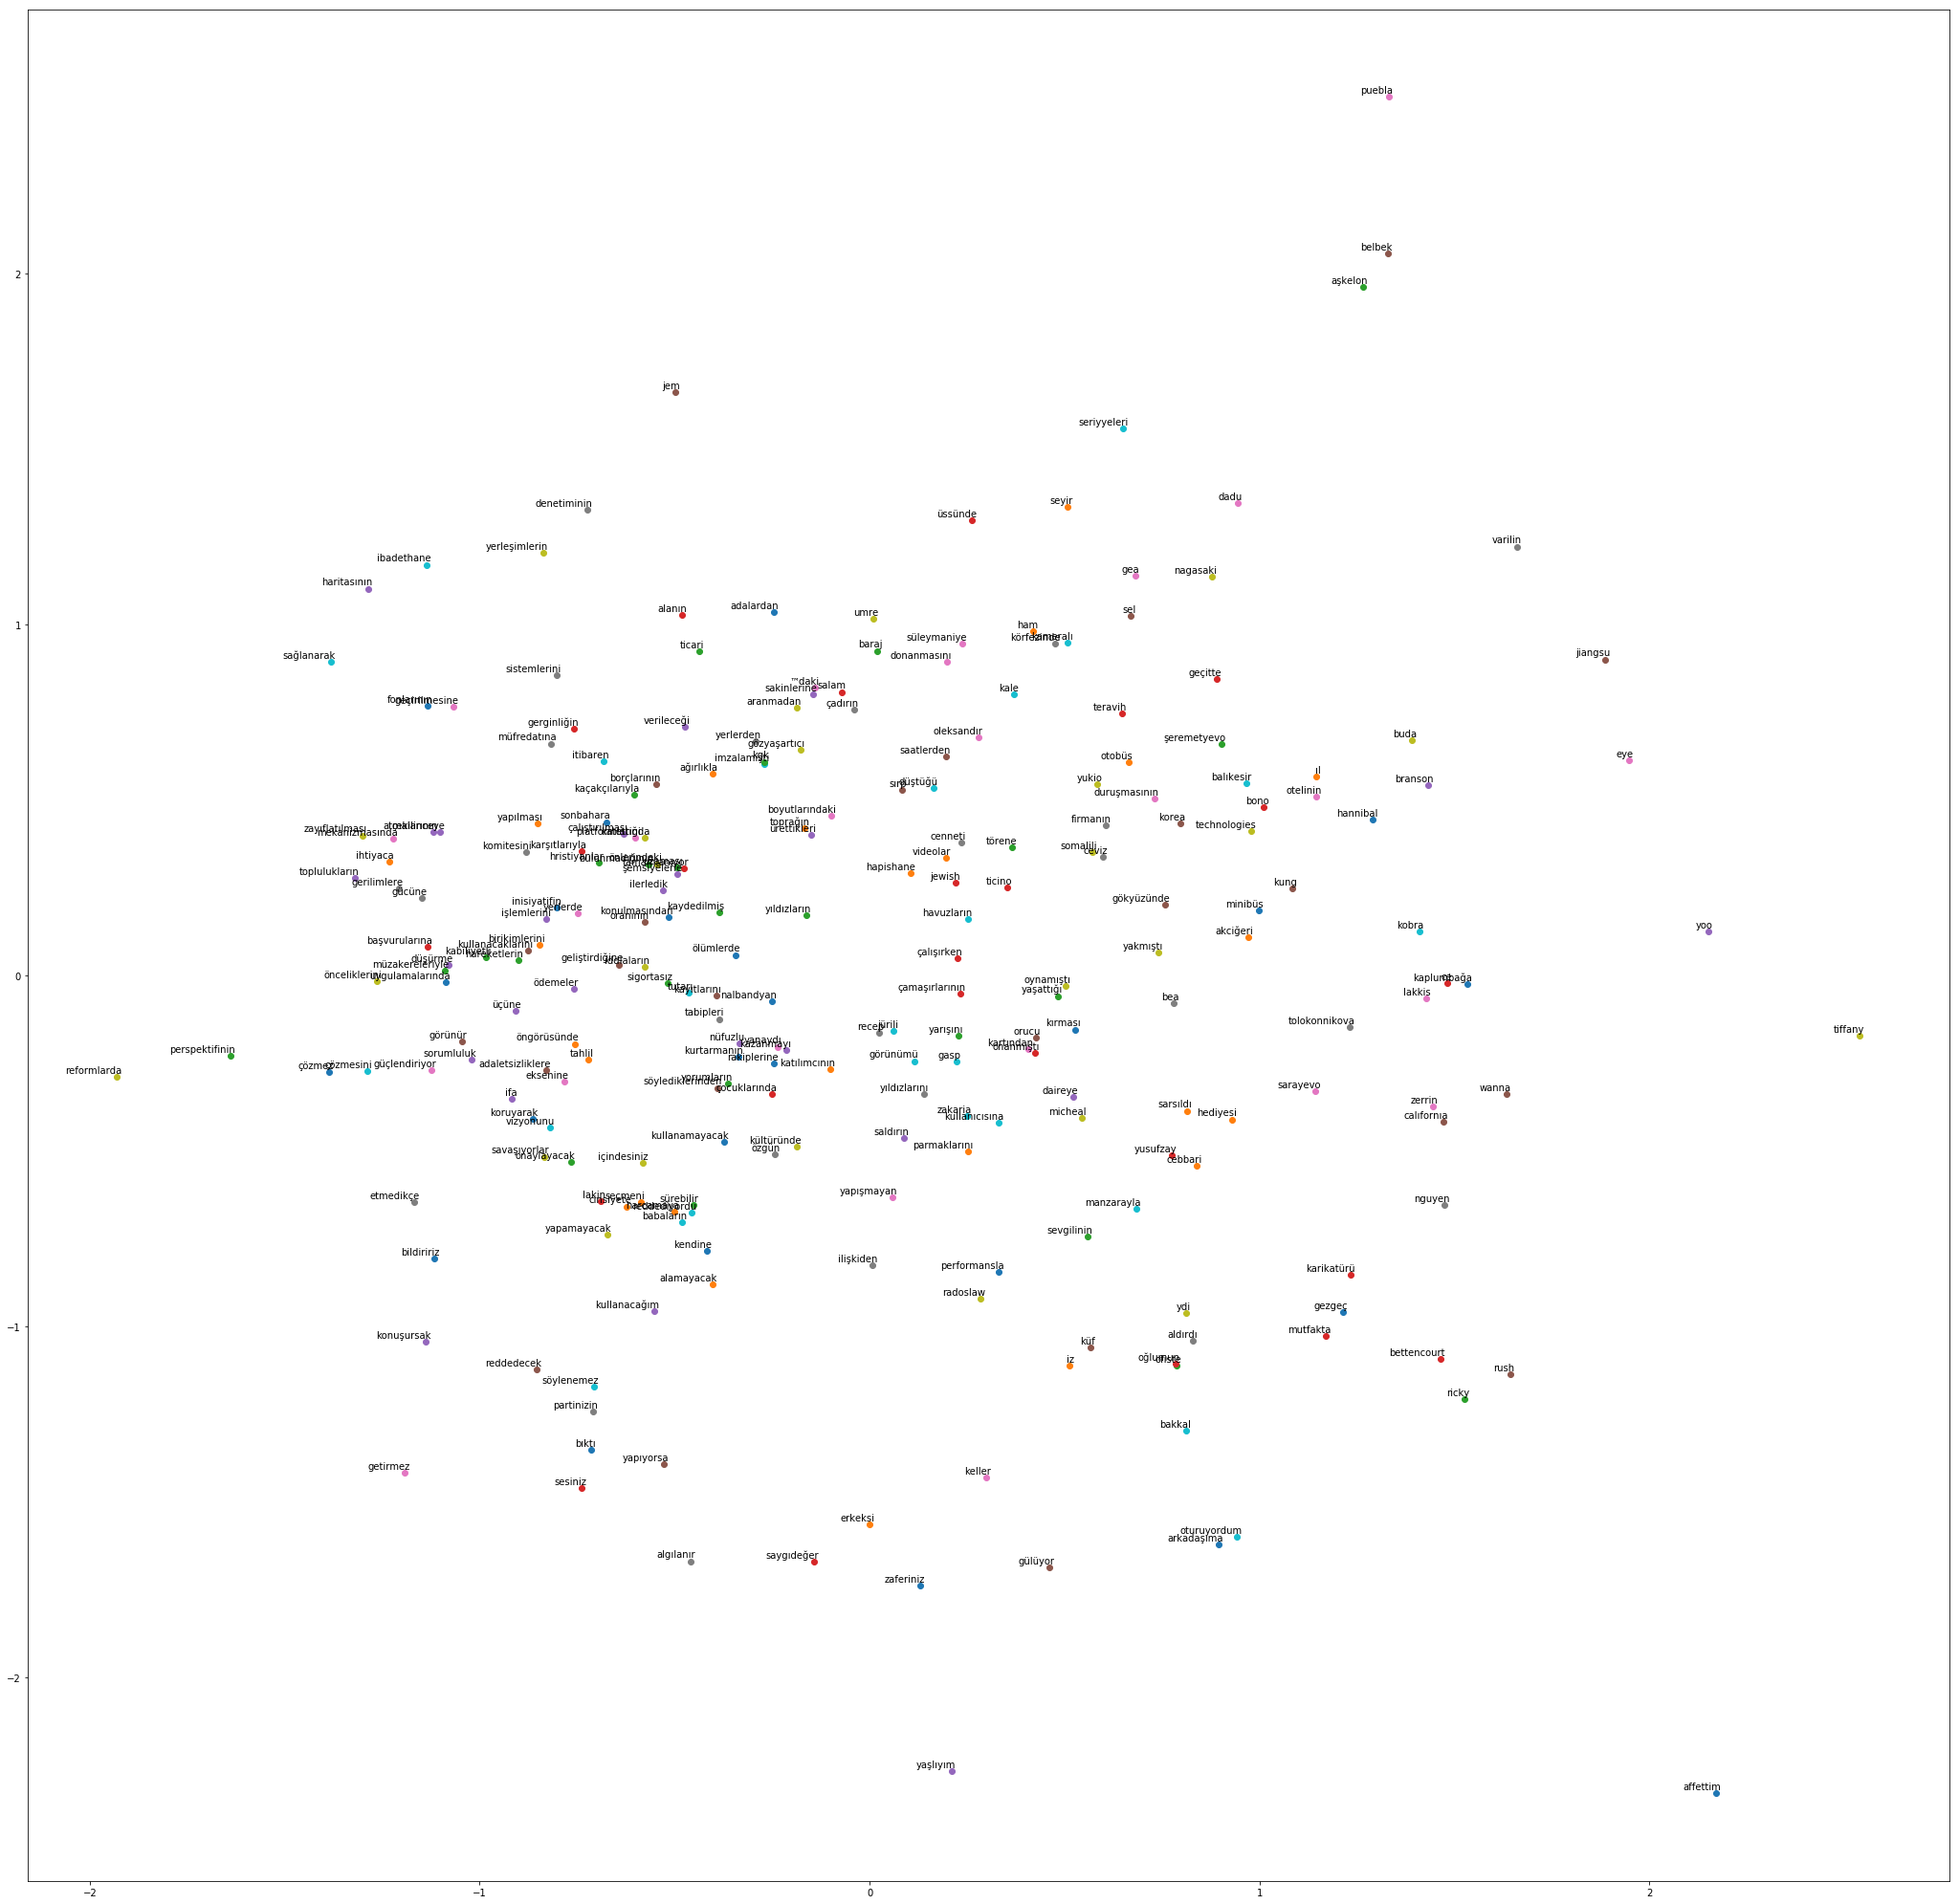

In [6]:
pca_plot(words,vectors,36)

# Read sample words

In [7]:
fp = open('words.txt','rt')
words = [ x.strip() for x in fp.readlines()]
fp.close()

# Unsuprevised Model tranined with skipgram + subwords

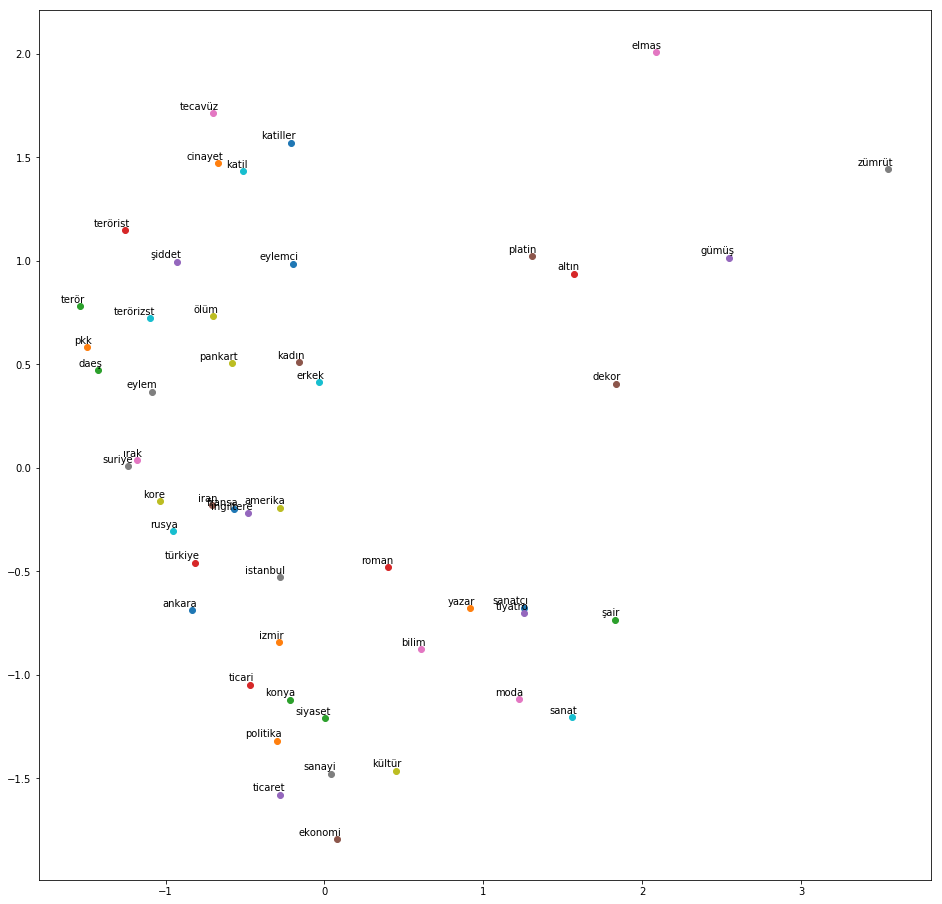

In [8]:
model = fasttext.load_model('../example/models/news_skipgram_subword_01.bin')
vectors = get_vectors(model,words)
pca_plot(words,vectors,16)

# Unsuprevised Model tranined with skipgram + without subwords

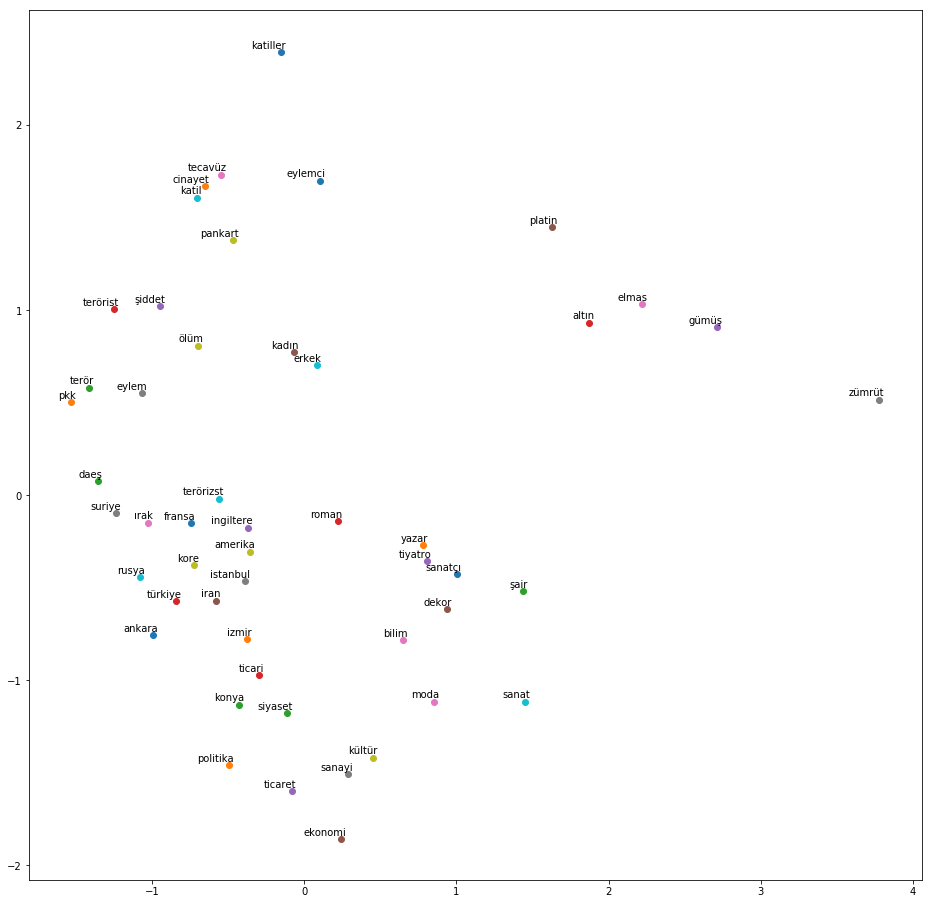

In [9]:
model = fasttext.load_model('../example/models/news_skipgram_02.bin')
vectors = get_vectors(model,words)
pca_plot(words,vectors,16)

# Unsuprevised Model tranined with cbow + subwords

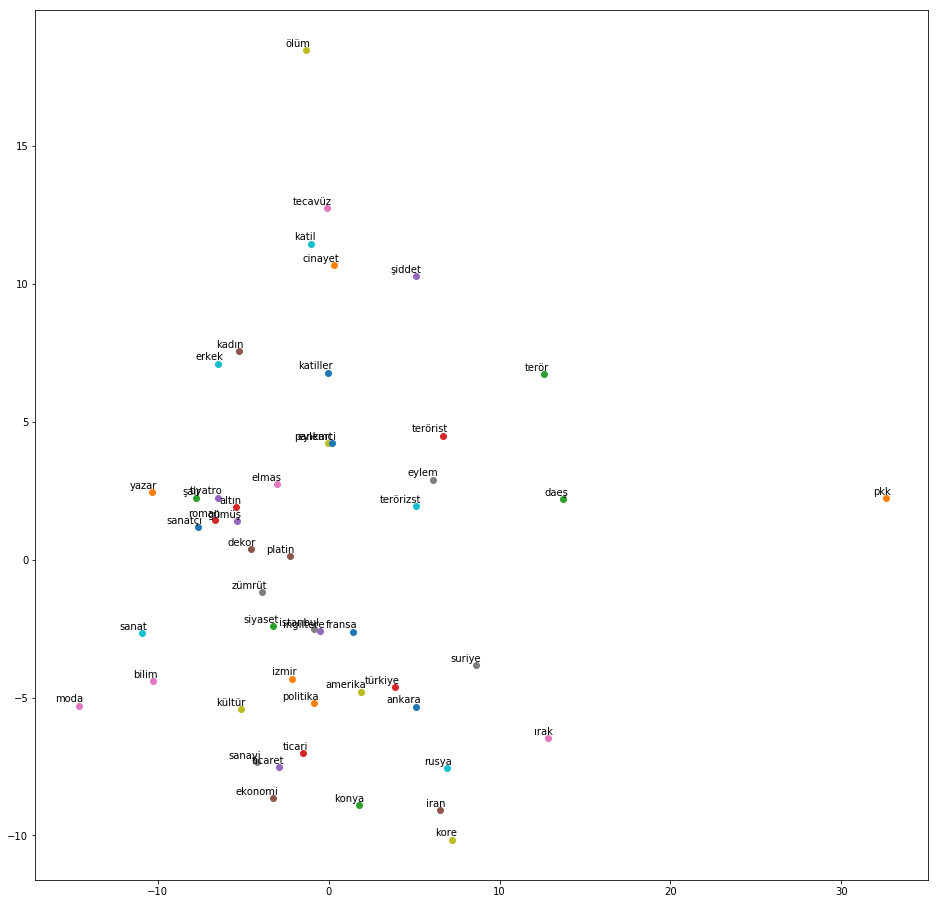

In [10]:
model = fasttext.load_model('../example/models/news_cbow_subwords_01.bin')
vectors = get_vectors(model,words)
pca_plot(words,vectors,16)

# Unsuprevised Model tranined with cbow + without subwords

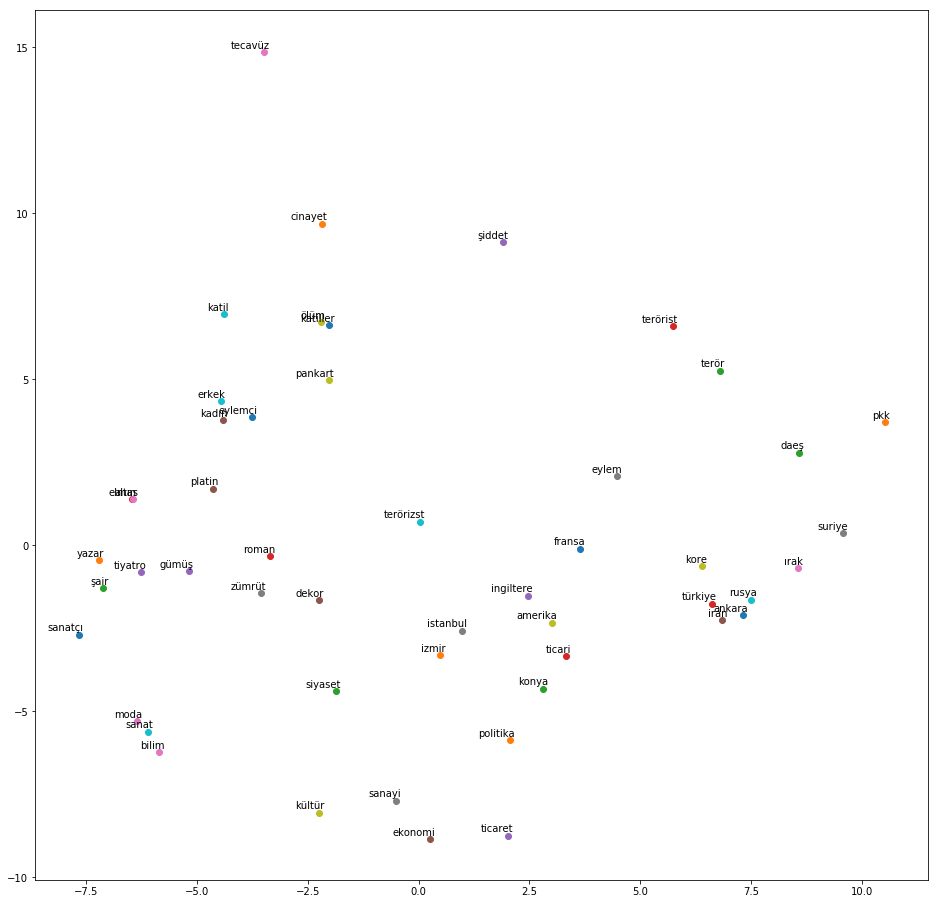

In [11]:
model = fasttext.load_model('../example/models/news_cbow_02.bin')
vectors = get_vectors(model,words)
pca_plot(words,vectors,16)